In [8]:
from local_vars import root_folder

data_folder = "Circles"
number_of_train_images = 10000
number_of_validation_images = 200
number_of_test_images = 200

image_size = 128
min_circle_diameter = 5
max_circle_diameter = 10
noise_amp_ratio = 0.5     # Between 0.0 and 1.0. But 1.0 means there is no signal, just noise.
no_object_ratio = 0.5     # This portion of the images will not contain any object (approximately)

In [9]:
import numpy as np
import cv2
import pandas as pd
import random
from matplotlib import pyplot as plt

In [10]:
def generate_image(no_object_probability=0.0):
    img = np.zeros((image_size,image_size), np.uint8)
    margin_size = max_circle_diameter // 2 + 1
    x = np.random.randint(margin_size, image_size - margin_size)
    y = np.random.randint(margin_size, image_size - margin_size)
    diameter = np.random.randint(min_circle_diameter, max_circle_diameter)
    random_number = np.random.rand()
    class_number = 0
    if random_number < no_object_probability:
        img = cv2.circle(img, (x, y), diameter, 255 * (1.0 - noise_amp_ratio), -1)
        class_number = 1
    else:
        x = 0
        y = 0
    noise = np.random.random((image_size, image_size)) * 255
    img = img + noise * noise_amp_ratio
    return img, class_number, (x, y)

1


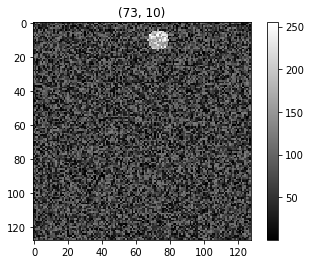

In [11]:
img, class_number, (x, y) = generate_image(no_object_ratio)
plt.title(str((x,y)))
plt.imshow(img[:, :], cmap='gray')
out = plt.colorbar()
print(class_number)

In [12]:
import os.path

data_fullpath = os.path.join(root_folder, data_folder)
train_fullpath = os.path.join(data_fullpath, "train")
valid_fullpath = os.path.join(data_fullpath, "valid")
test_fullpath = os.path.join(data_fullpath, "test")

paths = [data_fullpath, train_fullpath, valid_fullpath, test_fullpath]
for p in paths:
    if not os.path.exists(p):
        os.makedirs(p)
        print("Created folder: " + p)

Created folder: c:\Temp\Circles\train
Created folder: c:\Temp\Circles\valid
Created folder: c:\Temp\Circles\test


In [13]:
def create_data_package(fullpath, n_images):
    annotations_df = pd.DataFrame(columns=["file_name", "class", "x_position", "y_position"])
    
    for i in range(n_images):
        image_file_name = "{:0>5d}".format(i) + ".png"
        image_fullpath = os.path.join(fullpath, image_file_name)
        img, class_number, (x, y) = generate_image(no_object_ratio)
        annotations_df.loc[i] = [image_file_name, class_number, x, y]
        success = cv2.imwrite(image_fullpath, img)
    
    annotations_file_name = "annotations.csv"
    annotations_fullpath = os.path.join(fullpath, annotations_file_name)
    annotations_df.to_csv(annotations_fullpath)

In [14]:
create_data_package(train_fullpath, number_of_train_images)
print("Created {} training images".format(number_of_train_images))
create_data_package(valid_fullpath, number_of_validation_images)
print("Created {} validation images".format(number_of_validation_images))
create_data_package(test_fullpath, number_of_test_images)
print("Created {} test images".format(number_of_test_images))

Created 10000 training images
Created 200 validation images
Created 200 test images
